P(at least 4 smokers out of 10): 0.3503892815999998


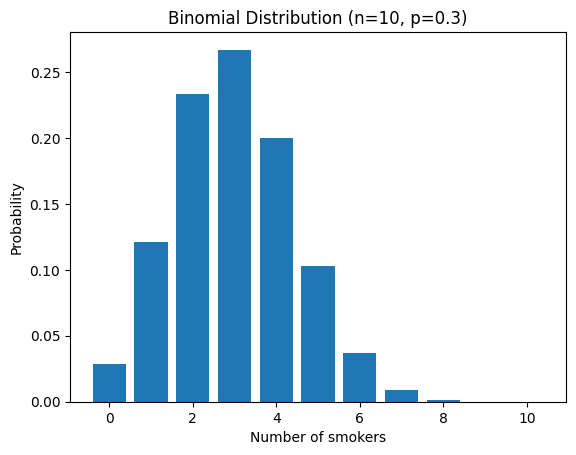

P(exactly 5 with expenses > $20,000): 0.10839841791326008
P(at most 5 with expenses > $20,000): 0.9335980746837185


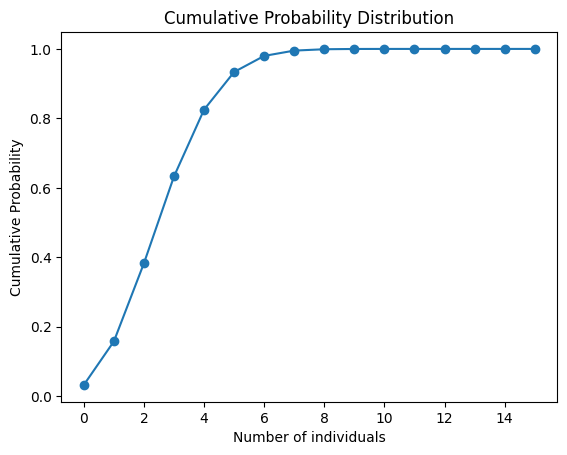

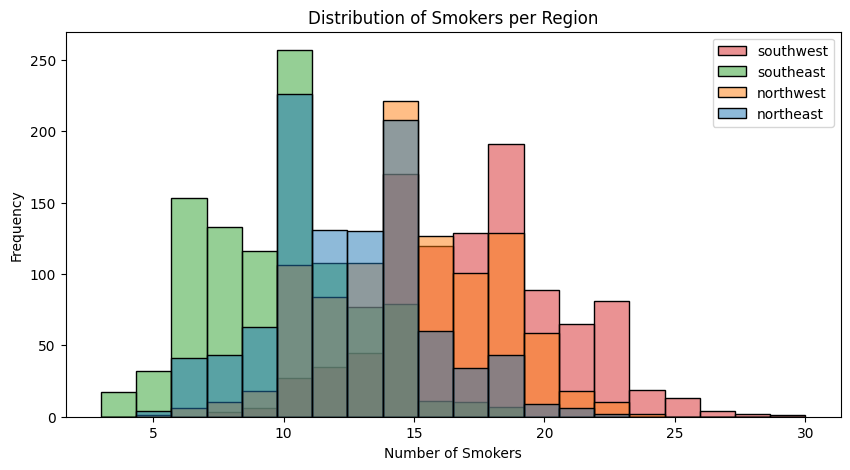

Expected smokers per region: {'southwest': 12.5, 'southeast': 15.0, 'northwest': 10.0, 'northeast': 17.5}
High-risk threshold expense: 34831.716
P(8 high-risk individuals in 30): 0.005811799928823498


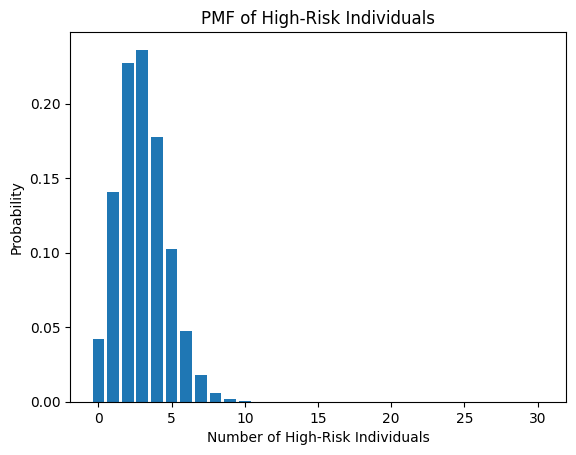

P(at least 5 with >3 children): 2.2462559103542112e-05


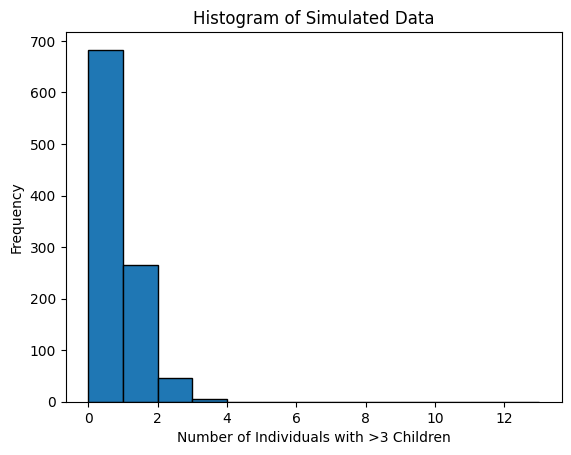

Theoretical Mean: 0.38565022421524664 Simulated Mean: 0.375
Theoretical Variance: 0.3732563829288075 Simulated Variance: 0.362375


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
import pandas as pd

# Load dataset
csv_file_path = "/content/insurance dataset.zip"
df = pd.read_csv(csv_file_path, encoding='utf-8')

# Convert categorical columns
smoker_map = {'yes': 1, 'no': 0}
df['smoker'] = df['smoker'].map(smoker_map)

# Question 1a: Probability that at least 4 out of 10 are smokers
n1, p1 = 10, 0.3
prob_at_least_4 = 1 - binom.cdf(3, n1, p1)
print("P(at least 4 smokers out of 10):", prob_at_least_4)

# Question 1b: Binomial Distribution plot
x = np.arange(0, n1+1)
y = binom.pmf(x, n1, p1)
plt.bar(x, y)
plt.xlabel("Number of smokers")
plt.ylabel("Probability")
plt.title("Binomial Distribution (n=10, p=0.3)")
plt.show()

# Question 2a: Probability of exactly 5 having expenses above $20,000
p2 = (df['expenses'] > 20000).mean()
n2 = 15
prob_exactly_5 = binom.pmf(5, n2, p2)
print("P(exactly 5 with expenses > $20,000):", prob_exactly_5)

# Question 2b: Cumulative probability at most 5
prob_at_most_5 = binom.cdf(5, n2, p2)
print("P(at most 5 with expenses > $20,000):", prob_at_most_5)

# Question 2c: CDF plot
x2 = np.arange(0, n2+1)
y2 = binom.cdf(x2, n2, p2)
plt.plot(x2, y2, marker='o')
plt.xlabel("Number of individuals")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Probability Distribution")
plt.show()

# Question 3: Simulating regional smoking rates
regions = {"southwest": 0.25, "southeast": 0.30, "northwest": 0.20, "northeast": 0.35}
sim_data = {}
for region, prob in regions.items():
    sim_data[region] = np.random.binomial(50, prob, 1000)

# Question 3b: Bar chart
plt.figure(figsize=(10,5))
sns.histplot(pd.DataFrame(sim_data), kde=False, bins=20)
plt.xlabel("Number of Smokers")
plt.ylabel("Frequency")
plt.title("Distribution of Smokers per Region")
plt.legend(regions.keys())
plt.show()

# Question 3c: Expected values
expected_smokers = {region: 50 * prob for region, prob in regions.items()}
print("Expected smokers per region:", expected_smokers)

# Question 4: High-risk insurance threshold
q_threshold = np.percentile(df['expenses'], 90)
print("High-risk threshold expense:", q_threshold)

# Question 4b: Probability of selecting 8 high-risk individuals in a sample of 30
p_high_risk = (df['expenses'] > q_threshold).mean()
n4 = 30
prob_8_high_risk = binom.pmf(8, n4, p_high_risk)
print("P(8 high-risk individuals in 30):", prob_8_high_risk)

# Question 4c: PMF plot
x4 = np.arange(0, n4+1)
y4 = binom.pmf(x4, n4, p_high_risk)
plt.bar(x4, y4)
plt.xlabel("Number of High-Risk Individuals")
plt.ylabel("Probability")
plt.title("PMF of High-Risk Individuals")
plt.show()

# Question 5: Probability of at least 5 with >3 children
p5 = (df['children'] > 3).mean()
n5 = 12
prob_at_least_5_children = 1 - binom.cdf(4, n5, p5)
print("P(at least 5 with >3 children):", prob_at_least_5_children)

# Question 5b: Simulation & histogram
sim_children = np.random.binomial(n5, p5, 1000)
plt.hist(sim_children, bins=range(0, n5+2), edgecolor='black')
plt.xlabel("Number of Individuals with >3 Children")
plt.ylabel("Frequency")
plt.title("Histogram of Simulated Data")
plt.show()

# Question 5c: Compare mean and variance
theoretical_mean = n5 * p5
theoretical_var = n5 * p5 * (1 - p5)
simulated_mean = np.mean(sim_children)
simulated_var = np.var(sim_children)
print("Theoretical Mean:", theoretical_mean, "Simulated Mean:", simulated_mean)
print("Theoretical Variance:", theoretical_var, "Simulated Variance:", simulated_var)
